In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

churn = pd.read_csv('./churn.csv')

In [8]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit("has_churned ~ time_since_first_purchase * time_since_last_purchase", data=churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [12]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

from itertools import product
# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Print the result
print(explanatory_data)

      time_since_first_purchase  time_since_last_purchase
0                          -2.0                      -1.0
1                          -2.0                      -0.9
2                          -2.0                      -0.8
3                          -2.0                      -0.7
4                          -2.0                      -0.6
...                         ...                       ...
4326                        4.0                       5.6
4327                        4.0                       5.7
4328                        4.0                       5.8
4329                        4.0                       5.9
4330                        4.0                       6.0

[4331 rows x 2 columns]


In [13]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

from itertools import product
# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# See the result
print(prediction_data)

      time_since_first_purchase  time_since_last_purchase  has_churned  \
0                          -2.0                      -1.0     0.716256   
1                          -2.0                      -0.9     0.720279   
2                          -2.0                      -0.8     0.724266   
3                          -2.0                      -0.7     0.728218   
4                          -2.0                      -0.6     0.732134   
...                         ...                       ...          ...   
4326                        4.0                       5.6     0.898775   
4327                        4.0                       5.7     0.906440   
4328                        4.0                       5.8     0.913580   
4329                        4.0                       5.9     0.920223   
4330                        4.0                       6.0     0.926396   

      most_likely_outcome  
0                     1.0  
1                     1.0  
2                     1.0  

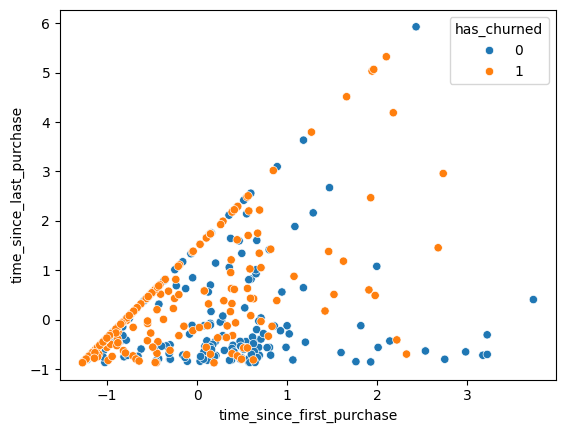

In [14]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Show the plot
plt.show()

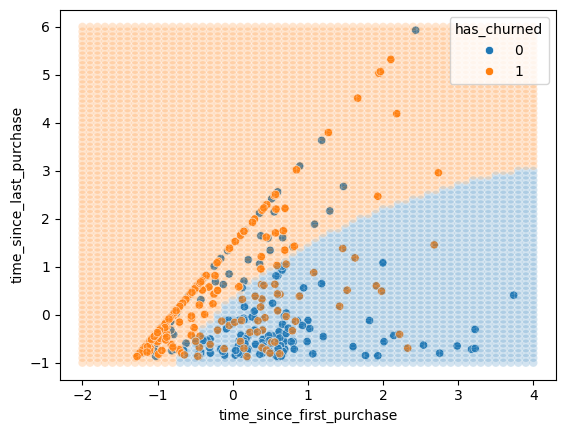

In [15]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data, 
                hue="most_likely_outcome", 
                alpha=0.2,
                legend=False)

# Show the plot
plt.show()

In [16]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Print it
print(conf_matrix)

[[102.  98.]
 [ 53. 147.]]


In [17]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


In [19]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf_man"], logistic_dist["log_cdf_man"]))

True


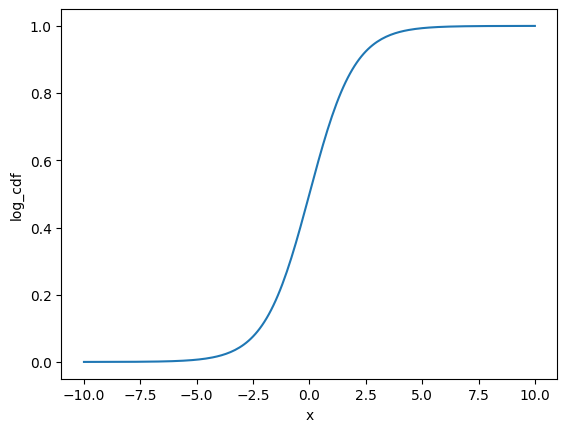

In [20]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x",
             y="log_cdf",
             data=logistic_dist)

# Show the plot
plt.show()

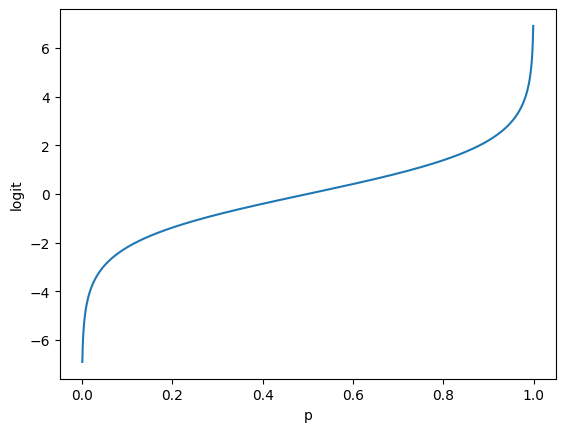

In [21]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",
             y="logit",
             data=logistic_dist_inv)

# Show the plot
plt.show()

In [23]:
x_actual = [10,9,5,5,5,3,7,6,1,3,1,9,5,4,4,2,6,1,8,7,3,7,1,7,4,2,5,5,4,5,0,7,1,6,7,0,2,1,6,5,0,0,5,6,4,8,9,3,0,1,4,1,3,5,5,0,8,7,1,5,2,6,3,4,0,8,6,5,6,5,9,3,8,0,10,1,3,3,2,1,4,6,7,3,7,9,1,0,0,0,1,0,4,0,5,5,9,3,5,9,4,1,6,6,6,6,8,1,2,3,5,7,3,6,8,2,1,0,3,5,5,5,4,0,7,6,4,5,6,7,8,3,5,8,6,0,5,6,0,5,5,3,5,5,1,5,0,8,0,8,7,9,1,6,0,0,0,4,5,4,8,3,0,5,0,1,6,8,5,1,0,5,9,4,7,3,0,9,4,1,0,8,3,0,0,3,3,0,8,0,8,2,7,5,0,5,2,8,7,8,0,5,3,5,1,3,10,3,1,8,5,1,2,9,3,8,1,6,5,8,9,0,10,0,6,6,0,8,0,0,3,0,1,9,4,7,10,0,0,0,2,7,3,8,3,5,6,0,0,1,7,0,9,2,5,1,1,1,6,0,4,3,5,3,7,4,3,5,5,0,1,8,5,1,7,7,5,3,6,3,6,9,1,2,7,3,9,5,6,5,0,7,5,7,6,3,4,4,0,10,4,0,3,0,3,5,1,0,5,0,2,4,9,5,6,2,7,2,10,5,0,4,1,6,2,8,7,3,3,0,0,0,2,5,5,6,2,5,9,5,0,2,9,8,0,0,2,1,6,5,5,3,3,3,1,5,1,9,6,0,10,8,4,10,7,4,1,2,1,3,5,5,7,1,5,0,2,8,8,6,5,9,0,4,0,10,0,3,4,8,9,1,6,4,1,4,1,4,2,1,5,3,1,9,5,6,7,0,3,0,9,7,5,9]
y_actual = [11.467473524962026,12.768532526474868,14.31164901664126,16.58093797276831,13.040847201210116,9.712556732223774,12.19364599092268,14.1301059001511,5.688350983358472,6.686838124054374,12.526475037821315,17.579425113464215,11.89107413010574,7.201210287443172,10.37821482602104,15.279878971255467,21.210287443267493,11.316187594553554,12.79878971255656,14.43267776096804,8.865355521936342,15.612708018154104,7.443267776096724,14.493192133131425,11.739788199697273,8.16944024205738,17.00453857791203,10.166414523449184,14.22087745839618,17.276853252647275,6.686838124054374,7.5642965204234995,10.347957639939349,14.91679273827514,16.671709531013395,8.260211800302462,6.928895612707925,7.655068078668582,14.43267776096804,13.978819969742627,4.810892586989346,5.506807866868307,10.49924357034782,10.317700453857654,16.308623298033066,11.5885022692888,12.70801815431148,18.60816944024181,4.054462934946996,3.993948562783608,13.373676248108747,6.263237518910658,8.16944024205738,11.770045385778966,15.642965204235798,4.145234493192078,12.677760968229784,16.18759455370629,6.8381240544628445,12.829046898638255,6.444780635400822,19.12254160363061,8.381240544629238,16.6414523449317,7.655068078668582,13.40393343419044,15.340393343418858,17.18608169440219,10.953101361573228,12.70801815431148,17.85173978819946,12.34493192133115,10.98335854765492,6.051437216338799,16.459909228441536,8.92586989409973,11.134644478063391,7.745839636913664,9.016641452344812,8.01815431164891,12.19364599092268,11.134644478063391,14.553706505294814,5.355521936459837,13.222390317700278,15.37065052950055,8.16944024205738,5.537065052950002,14.52344931921312,7.655068078668582,13.736762481089077,13.071104387291808,6.596066565809292,4.871406959152735,12.40544629349454,15.673222390317491,18.00302571860793,10.468986384266124,15.43116490166394,18.81996974281367,11.558245083207108,9.954614220877325,16.459909228441536,13.82753403933416,9.22844175491667,21.482602118002735,14.251134644477874,8.048411497730605,10.317700453857654,8.593040847201095,15.612708018154104,11.921331316187436,6.9894099848713145,2.299546142208744,16.1270801815429,14.039334341906017,3.691376701966668,3.93343419062022,9.258698940998364,18.033282904689624,9.470499243570222,14.52344931921312,9.83358547655055,13.76701966717077,17.367624810892355,14.704992435703284,19.031770045385525,16.6414523449317,18.36611195158826,12.40544629349454,11.346444780635249,9.288956127080056,11.346444780635249,11.951588502269129,12.768532526474868,6.293494704992352,14.16036308623279,14.341906202722956,13.16187594553689,12.85930408471995,15.552193645990714,8.744326777609565,11.346444780635249,12.133131618759291,8.593040847201095,13.76701966717077,15.794251134644268,13.071104387291808,13.645990922843994,12.012102874432518,14.67473524962159,13.524962178517216,8.744326777609565,12.375189107412846,6.263237518910658,4.720121028744264,5.537065052950002,10.771558245083064,11.921331316187436,11.316187594553554,17.48865355521913,11.981845688350823,3.509833585476504,16.79273827534017,16.70196671709509,9.258698940998364,22.269288956126783,13.131618759455195,11.316187594553554,7.11043872919809,4.357034795763936,17.79122541603607,17.579425113464215,10.620272314674594,13.676248108925687,11.043872919818307,5.809379727685248,12.70801815431148,11.104387291981698,12.889561270801645,4.68986384266257,16.913767019666945,7.140695915279784,5.688350983358472,6.596066565809292,6.50529500756421,7.776096822995357,6.65658093797268,13.40393343419044,6.20272314674727,12.79878971255656,11.437216338880331,12.919818456883338,14.91679273827514,8.865355521936342,10.468986384266124,11.074130105900004,14.583963691376509,11.830559757942352,9.561270801815304,7.7155824508319695,13.888048411497545,9.53101361573361,13.948562783660934,8.048411497730605,6.475037821482515,13.31316187594536,10.347957639939349,7.927382753403827,12.375189107412846,15.794251134644268,13.16187594553689,9.409984871406834,17.54916792738252,6.323751891074045,14.553706505294814,12.012102874432518,12.34493192133115,13.25264750378197,12.163388804840988,23.6913767019664,11.649016641452189,14.67473524962159,12.79878971255656,13.91830559757924,14.82602118003006,3.872919818456832,12.163388804840988,14.099848714069404,5.748865355521859,10.105900151285796,4.447806354009018,5.264750378214755,9.803328290468857,7.231467473524865,11.89107413010574,18.729198184568585,11.80030257186066,12.284417549167763,8.986384266263117,8.714069591527872,12.526475037821315,10.105900151285796,14.583963691376509,6.565809379727598,12.34493192133115,12.284417549167763,6.9894099848713145,6.747352496217762,4.5385779122541,9.0771558245082,4.175491679273772,15.945537065052738,7.836611195158746,15.673222390317491,5.264750378214755,8.01815431164891,13.282904689863663,19.1527987897123,8.714069591527872,9.288956127080056,7.382753403933335,16.03630862329782,9.591527987896995,12.284417549167763,11.527987897125412,7.170953101361477,12.435703479576231,12.133131618759291,6.95915279878962,35.55219364599045,8.01815431164891,12.25416036308607,8.865355521936342,12.40544629349454,15.03782148260192,10.28744326777596,8.381240544629238,13.31316187594536,9.409984871406834,13.736762481089077,13.55521936459891,7.745839636913664,7.11043872919809,10.408472012102736,16.73222390317678,17.03479576399372,9.954614220877325,15.43116490166394,13.46444780635383,11.19515885022678,16.459909228441536,7.41301059001503,12.85930408471995,11.527987897125412,6.596066565809292,10.317700453857654,8.62329803328279,5.052950075642897,13.948562783660934,11.164901664145084,10.80181543116476,7.019667170953007,11.618759455370496,8.895612708018035,16.6414523449317,15.189107413010388,7.473524962178417,16.03630862329782,5.779122541603554,7.473524962178417,12.768532526474868,23.60060514372132,12.95007564296503,12.586989409984705,8.260211800302462,12.70801815431148,11.346444780635249,15.06807866868361,8.139183055975685,5.627836611195084,11.406959152798638,10.015128593040714,12.85930408471995,9.470499243570222,11.527987897125412,18.78971255673197,11.104387291981698,7.140695915279784,5.809379727685248,3.872919818456832,4.720121028744264,11.981845688350823,11.618759455370496,6.898638426626232,11.043872919818307,10.771558245083064,9.349470499243443,10.98335854765492,15.249621785173774,12.980332829046723,11.19515885022678,16.18759455370629,14.099848714069404,12.465960665657928,11.467473524962026,9.319213313161752,3.388804841149728,16.24810892586968,14.22087745839618,12.79878971255656,8.653555219364485,7.776096822995357,9.470499243570222,9.107413010589894,18.36611195158826,13.70650529500738,13.585476550680603,13.645990922843994,7.473524962178417,14.251134644477874,19.1527987897123,12.1028744326776,14.52344931921312,10.015128593040714,8.92586989409973,7.503782148260112,6.323751891074045,13.040847201210116,6.898638426626232,12.738275340393171,15.642965204235798,12.55673222390301,15.794251134644268,14.97730711043853,7.201210287443172,9.22844175491667,17.18608169440219,11.316187594553554,21.08925869894072,16.1270801815429,14.31164901664126,8.865355521936342,12.19364599092268,3.903177004538526,14.099848714069404,16.73222390317678,7.745839636913664,8.260211800302462,20.48411497730684,11.679273827533883,9.470499243570222,10.68078668683798,12.19364599092268,7.473524962178417,12.85930408471995,9.652042360060385,9.742813918305467,6.95915279878962,11.28593040847186,10.741301059001367,8.381240544629238,8.62329803328279,12.012102874432518,12.465960665657928,11.255673222390168,12.25416036308607,6.747352496217762,8.502269288956015,4.659606656580876,15.128593040847,12.284417549167763,15.885022692889349,19.334341906202464]
x_actual = np.array(x_actual)
y_actual = np.array(y_actual)

In [24]:
# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]))

-64079.06546893835


In [27]:
# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll
  
from scipy.optimize import minimize
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0, 0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 286.96293275181733
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [-4.551e+03 -2.149e+04]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 324
     njev: 104
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_58740\726849445.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_58740\726849445.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
